In [1]:
pip install newspaper3k transformers torch vaderSentiment spacy matplotlib


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 104.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
pip install lxml_html_clean


In [4]:
from newspaper import Article

# Define your articles by source
urls = {
    "Al Jazeera": [
        "https://www.aljazeera.net/news/2025/6/18/%D8%A5%D8%B3%D8%B1%D8%A7%D8%A6%D9%8A%D9%84-%D8%AA%D8%B9%D9%84%D9%86-%D8%AA%D8%AF%D9%85%D9%8A%D8%B1-%D9%85%D9%82%D8%B1-%D8%A7%D9%84%D8%A3%D9%85%D9%86-%D8%A7%D9%84%D8%A5%D9%8A%D8%B1%D8%A7%D9%86%D9%8A",
        "https://www.aljazeera.net/politics/2025/6/18/%D9%85%D8%A7%D8%B0%D8%A7-%D9%84%D9%88-%D8%AF%D8%AE%D9%84%D8%AA-%D8%A3%D9%85%D9%8A%D8%B1%D9%83%D8%A7-%D8%A7%D9%84%D8%AD%D8%B1%D8%A8-%D9%85%D8%A8%D8%A7%D8%B4%D8%B1%D8%A9-%D9%88%D9%85%D8%A7",
        "https://www.aljazeera.net/news/2025/6/18/%D8%B9%D8%A7%D8%AC%D9%84-%D8%AA%D8%B1%D8%A7%D9%85%D8%A8-%D9%82%D8%AF-%D8%A3%D9%82%D9%88%D9%85-%D8%A8%D8%B6%D8%B1%D8%A8-%D8%A7%D9%84%D9%85%D9%86%D8%B4%D8%A2%D8%AA"
    ],
    "CNN": [
        "https://edition.cnn.com/world/live-news/israel-iran-conflict-06-18-25-intl-hnk",
        "https://edition.cnn.com/2025/06/18/middleeast/us-iran-pandoras-box-intl",
        "https://edition.cnn.com/2025/06/17/politics/israel-iran-nuclear-bomb-us-intelligence-years-away?iid=cnn_buildContentRecirc_end_recirc"
    ]
}

# Store the data here
articles_data = {}

# Loop over sources and articles
for source, url_list in urls.items():
    articles_data[source] = []
    for url in url_list:
        try:
            article = Article(url)
            article.download()
            article.parse()
            articles_data[source].append({
                "url": url,
                "title": article.title,
                "text": article.text
            })
        except Exception as e:
            articles_data[source].append({
                "url": url,
                "title": "Failed to fetch",
                "text": str(e)
            })

# Print result sample
for source, articles in articles_data.items():
    print(f"\n===== {source} =====")
    for i, article in enumerate(articles, 1):
        print(f"\n--- Article {i} ---")
        print(f"Title: {article['title']}")
        print(f"Text Snippet: {article['text'][:300]}")



===== Al Jazeera =====

--- Article 1 ---
Title: إسرائيل تعلن تدمير مقر الأمن الإيراني ودوي انفجارات شرق وغرب طهران
Text Snippet: أعلنت إسرائيل الأربعاء، أنها دمرت مقر الأمن الداخلي الإيراني، بينما سمع دوي انفجارات شرق وغرب العاصمة طهران، وسط استمرار تبادل القصف بين الطرفين لليوم السادس على التوالي.

ونقلت هيئة البث الإسرائيلية عن وزير الدفاع الإسرائيلي يسرائيل كاتس، "دمرنا مقر الأمن الداخلي للنظام الإيراني وسنواصل تدمير رموز 

--- Article 2 ---
Title: ماذا لو دخلت أميركا الحرب مباشرة؟ وما الأهداف التي لا تتنازل عنها؟
Text Snippet: يقف العالم على أعتاب لحظة حاسمة عقب تصريحات للرئيس الأميركي دونالد ترامب بشأن اتخاذ ما قد يكون أخطر قرار في مسيرته السياسية، وهو توجيه ضربة عسكرية ضد البرنامج النووي الإيراني، استكمالا لما بدأه جيش الاحتلال الإسرائيلي منذ الجمعة الماضي.

وفي مواجهة هذا التصعيد المحتمل، تظهر المواقف الإيرانية رافضة ل

--- Article 3 ---
Title: ترامب: نفد صبرنا والأسبوع القادم سيكون حاسما لإيران
Text Snippet: أحجم الرئيس الأميركي دونالد ترامب اليوم الأربعاء، عن الإدلاء بإجابة 

In [5]:
from newspaper import Article


In [6]:
from transformers import pipeline
import torch

In [10]:
from transformers import MarianMTModel, MarianTokenizer

# Load translation model (ar → en)
model_name = "Helsinki-NLP/opus-mt-ar-en"
translator_tokenizer = MarianTokenizer.from_pretrained(model_name)
translator_model = MarianMTModel.from_pretrained(model_name)

def translate_ar_to_en(text):
    tokens = translator_tokenizer.prepare_seq2seq_batch([text], return_tensors="pt", truncation=True)
    translation = translator_model.generate(**tokens)
    return translator_tokenizer.decode(translation[0], skip_special_tokens=True)


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/917k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:177: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/308M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [11]:
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}


In [14]:


# Sentiment pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=0 if torch.cuda.is_available() else -1)
label_map = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}

# Translation (Arabic to English)
trans_tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-ar-en")
trans_model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-ar-en")

def translate_arabic(text):
    # Tokenize input (source = Arabic, target = English)
    inputs = trans_tokenizer(text, return_tensors="pt", truncation=True)
    translated = trans_model.generate(**inputs)
    return trans_tokenizer.decode(translated[0], skip_special_tokens=True)





Device set to use cpu


In [15]:
# Apply to articles
for source, articles in articles_data.items():
    for article in articles:
        text = article["text"]
        if not text or len(text) < 50:
            article["sentiment"] = "Too Short"
            continue

        # Translate if Arabic
        if any("\u0600" <= c <= "\u06FF" for c in text):  # Arabic Unicode range
            try:
                text = translate_arabic(text[:500])
            except:
                article["sentiment"] = "Translation Error"
                continue

        # Sentiment analysis
        try:
            result = sentiment_pipeline(text[:512])[0]
            article["sentiment"] = label_map.get(result["label"], result["label"])
            article["score"] = result["score"]
        except:
            article["sentiment"] = "Sentiment Error"

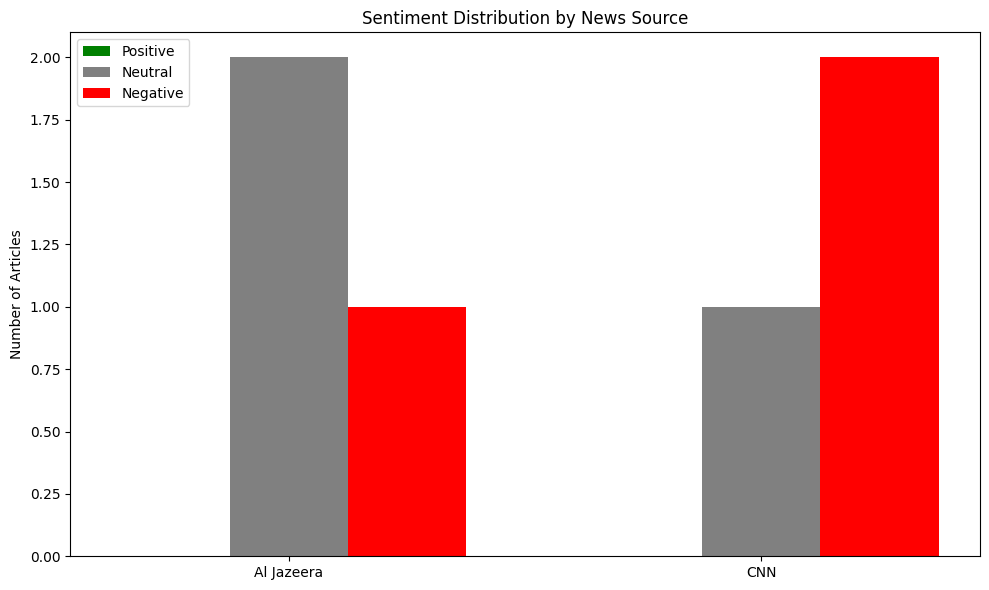

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

# Count sentiments per source
sentiment_counts = {}

for source, articles in articles_data.items():
    sentiments = [article["sentiment"] for article in articles if article["sentiment"] in ["Positive", "Negative", "Neutral"]]
    sentiment_counts[source] = Counter(sentiments)

# Get unique sentiment labels
all_sentiments = ["Positive", "Neutral", "Negative"]

# Create bar plot
sources = list(sentiment_counts.keys())
x = range(len(sources))
bar_width = 0.25

# Get values for each sentiment type
positive_vals = [sentiment_counts[src].get("Positive", 0) for src in sources]
neutral_vals  = [sentiment_counts[src].get("Neutral", 0) for src in sources]
negative_vals = [sentiment_counts[src].get("Negative", 0) for src in sources]

# Plot
plt.figure(figsize=(10, 6))
plt.bar([i - bar_width for i in x], positive_vals, width=bar_width, label='Positive', color='green')
plt.bar(x, neutral_vals, width=bar_width, label='Neutral', color='gray')
plt.bar([i + bar_width for i in x], negative_vals, width=bar_width, label='Negative', color='red')

# Add labels
plt.xticks(x, sources)
plt.ylabel("Number of Articles")
plt.title("Sentiment Distribution by News Source")
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
!pip install bertopic umap-learn sentence-transformers



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 11.5 MB/s eta 0:00:00


In [92]:
jazeera_articles = [
    "https://www.aljazeera.net/news/2025/6/18/%D8%A5%D9%8A%D8%B1%D8%A7%D9%86-%D8%AA%D9%86%D9%81%D9%8A-%D8%A5%D8%B1%D8%B3%D8%A7%D9%84-%D9%88%D9%81%D8%AF-%D9%84%D9%84%D8%AE%D8%A7%D8%B1%D8%AC-%D9%88%D8%AA%D8%A4%D9%83%D8%AF-%D9%84%D8%A7",
    "https://www.aljazeera.net/news/2025/6/18/%D8%AE%D8%B7%D8%A9-%D8%A3%D9%85%D9%8A%D8%B1%D9%83%D9%8A%D8%A9-%D9%84%D9%84%D8%A5%D8%AC%D9%84%D8%A7%D8%A1-%D9%85%D9%86-%D8%A5%D8%B3%D8%B1%D8%A7%D8%A6%D9%8A%D9%84-%D9%88%D8%AF%D9%88%D9%84",
    "https://www.aljazeera.net/encyclopedia/2025/6/18/%D8%A7%D9%84%D8%AF%D9%84%D8%A7%D9%84%D8%A7%D8%AA-%D8%A7%D9%84%D8%B1%D9%85%D8%B2%D9%8A%D8%A9-%D9%88%D8%A7%D9%84%D8%AF%D9%8A%D9%86%D9%8A%D8%A9-%D9%84%D8%AA%D8%B3%D9%85%D9%8A%D8%A7%D8%AA",
    "https://www.aljazeera.net/politics/2025/6/18/%D9%83%D9%8A%D9%81-%D8%AA%D8%AA%D8%AD%D8%B3%D8%A8-%D8%A3%D9%86%D9%82%D8%B1%D8%A9-%D9%85%D9%86-%D8%AA%D9%87%D8%AF%D9%8A%D8%AF%D8%A7%D8%AA-%D8%A5%D8%B3%D8%B1%D8%A7%D8%A6%D9%8A%D9%84-%D8%A8%D8%B9%D8%AF",
    "https://www.aljazeera.net/news/2025/6/18/%D8%B9%D8%A7%D8%AC%D9%84-%D8%AA%D8%B1%D8%A7%D9%85%D8%A8-%D9%82%D8%AF-%D8%A3%D9%82%D9%88%D9%85-%D8%A8%D8%B6%D8%B1%D8%A8-%D8%A7%D9%84%D9%85%D9%86%D8%B4%D8%A2%D8%AA",
    "https://www.aljazeera.net/opinions/2025/6/18/%D8%A7%D9%84%D8%A2%D9%86-%D9%84%D8%A3%D9%86-%D8%A7%D9%84%D8%BA%D8%AF-%D8%A3%D8%B3%D9%88%D8%A3-%D9%85%D9%86%D8%B7%D9%82-%D9%86%D8%AA%D9%86%D9%8A%D8%A7%D9%87%D9%88-%D9%81%D9%8A",
    "https://www.aljazeera.net/opinions/2025/6/17/%D9%86%D8%AA%D9%86%D9%8A%D8%A7%D9%87%D9%88-%D8%A7%D9%84%D9%81%D8%A7%D8%B4%D9%84-%D9%81%D9%8A-%D8%BA%D8%B2%D8%A9-%D9%88%D8%A5%D9%8A%D8%B1%D8%A7%D9%86",
    "https://www.aljazeera.net/opinions/2025/6/18/%D8%B6%D8%B1%D8%A8%D8%A9-%D8%A5%D9%8A%D8%B1%D8%A7%D9%86-%D8%A7%D9%84%D9%85%D8%B1%D8%AA%D8%AF%D8%A9-%D8%A7%D9%84%D9%82%D8%A7%D8%B5%D9%85%D8%A9-%D9%84%D8%A5%D8%B3%D8%B1%D8%A7%D8%A6%D9%8A%D9%84",
    "https://www.aljazeera.net/opinions/2025/6/17/%D8%A3%D9%88%D8%B1%D8%A7%D9%82-%D8%A5%D9%8A%D8%B1%D8%A7%D9%86-%D8%A7%D9%84%D8%B1%D8%A7%D8%A8%D8%AD%D8%A9-%D9%88%D8%AD%D9%85%D8%A7%D9%82%D8%A9-%D8%A5%D8%B3%D8%B1%D8%A7%D8%A6%D9%8A%D9%84",
    "https://www.aljazeera.net/opinions/2025/6/16/%D9%83%D9%8A%D9%81-%D8%A7%D9%86%D9%82%D9%84%D8%A8%D8%AA-%D8%A5%D8%B3%D8%B1%D8%A7%D8%A6%D9%8A%D9%84-%D9%85%D9%86-%D8%A7%D9%84%D8%AF%D8%A7%D8%AE%D9%84-%D8%B1%D8%A3%D8%B3%D8%A7-%D8%B9%D9%84%D9%89",
    ]



In [93]:
from newspaper import Article

# Create empty list to store cleaned texts
aj_articles = []

# Loop through URLs and extract text
for url in jazeera_articles:
    try:
        article = Article(url)
        article.download()
        article.parse()
        cleaned_text = article.text.strip()
        if cleaned_text:  # Check if not empty
            aj_articles.append(cleaned_text)
    except Exception as e:
        print(f" Error with {url}: {e}")

print(f" Extracted {len(aj_articles)} Al Jazeera articles.")


 Extracted 10 Al Jazeera articles.


In [124]:
from sklearn.cluster import KMeans
from bertopic import BERTopic

kmeans = KMeans(n_clusters=5)  # or try 3-6 based on variety
topic_model = BERTopic(language="multilingual", verbose=True, hdbscan_model=kmeans)
topics, probs = topic_model.fit_transform(aj_articles_cleaned, embeddings)


2025-06-18 18:30:39,091 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-18 18:30:39,120 - BERTopic - Dimensionality - Completed ✓
2025-06-18 18:30:39,121 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-18 18:30:39,221 - BERTopic - Cluster - Completed ✓
2025-06-18 18:30:39,225 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-18 18:30:39,256 - BERTopic - Representation - Completed ✓


In [125]:
print(topic_model.get_topic_info())


   Topic  Count                         Name  \
0      0      3             0_أن_في_إيران_من   
1      1      2       1_في_على_إسرائيل_إيران   
2      2      2              2_من_في_إلى_على   
3      3      2            3_في_إيران_من_على   
4      4      1  4_في_على_الإسرائيلي_إسرائيل   

                                      Representation  \
0  [أن, في, إيران, من, على, إلى, إسرائيل, الخارجي...   
1  [في, على, إسرائيل, إيران, أو, من, أن, مع, هذه,...   
2  [من, في, إلى, على, ما, اليهود, نتنياهو, السامي...   
3  [في, إيران, من, على, إسرائيل, أن, المتحدة, الإ...   
4  [في, على, الإسرائيلي, إسرائيل, عملية, الاسم, ا...   

                                 Representative_Docs  
0  [نفت إيران الأربعاء معلومات عن إرسالها وفدا لل...  
1  [أنقرة- في ظل المواجهة المتصاعدة بين إسرائيل و...  
2  [تشكّل مأزق نتنياهو الأول، وتفاقم، في مدى عشري...  
3  [لطالما حاولت إسرائيل وحلفاؤها من المحافظين ال...  
4  [سلطت عملية "الأسد الصاعد" -الاسم الذي اختارته...  


In [126]:
for topic_id in set(topics):
    print(f"\n Topic {topic_id}:")
    for word, weight in topic_model.get_topic(topic_id):
        print(f"  - {word} ({weight:.4f})")



 Topic 0:
  - أن (0.0621)
  - في (0.0615)
  - إيران (0.0498)
  - من (0.0493)
  - على (0.0487)
  - إلى (0.0473)
  - إسرائيل (0.0396)
  - الخارجية (0.0349)
  - طهران (0.0338)
  - ترامب (0.0328)

 Topic 1:
  - في (0.0608)
  - على (0.0551)
  - إسرائيل (0.0388)
  - إيران (0.0374)
  - أو (0.0362)
  - من (0.0362)
  - أن (0.0356)
  - مع (0.0296)
  - هذه (0.0279)
  - هذا (0.0272)

 Topic 2:
  - من (0.0763)
  - في (0.0724)
  - إلى (0.0441)
  - على (0.0384)
  - ما (0.0302)
  - اليهود (0.0246)
  - نتنياهو (0.0232)
  - السامية (0.0228)
  - كما (0.0226)
  - أن (0.0222)

 Topic 3:
  - في (0.0681)
  - إيران (0.0578)
  - من (0.0560)
  - على (0.0462)
  - إسرائيل (0.0436)
  - أن (0.0426)
  - المتحدة (0.0333)
  - الإيرانية (0.0296)
  - إلى (0.0283)
  - الولايات (0.0236)

 Topic 4:
  - في (0.0702)
  - على (0.0584)
  - الإسرائيلي (0.0566)
  - إسرائيل (0.0479)
  - عملية (0.0472)
  - الاسم (0.0413)
  - العسكرية (0.0409)
  - من (0.0337)
  - الجيش (0.0319)
  - مما (0.0279)


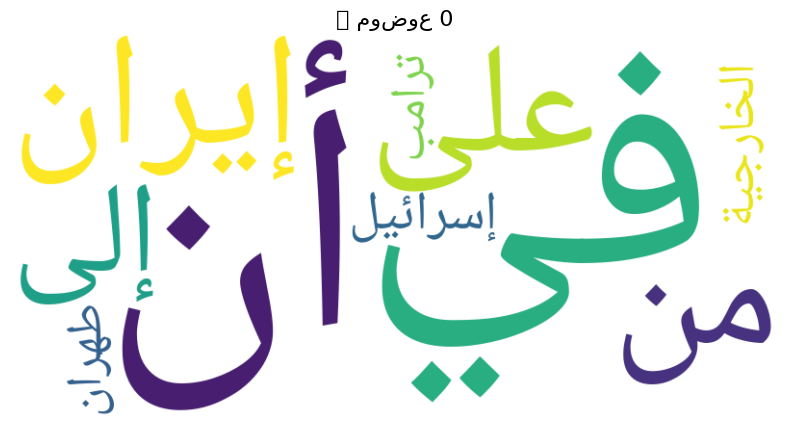

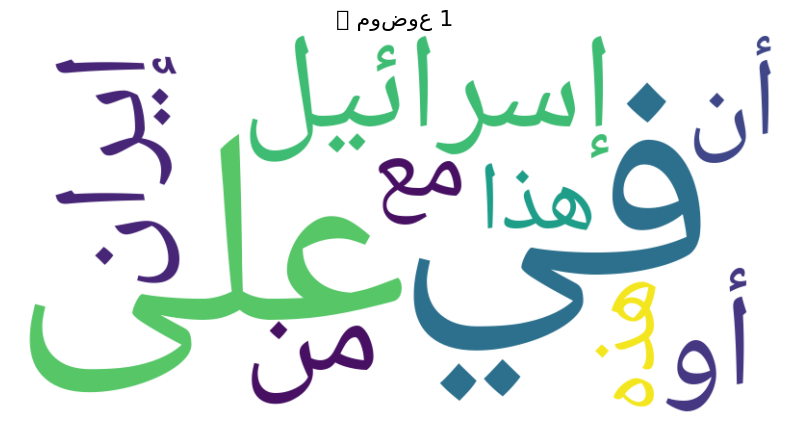

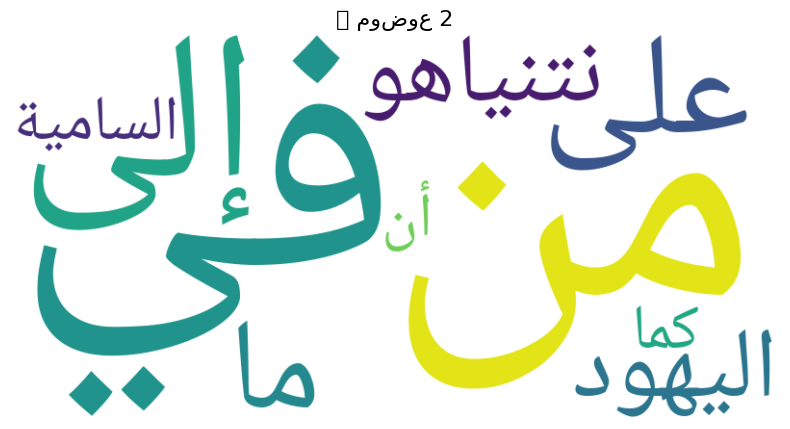

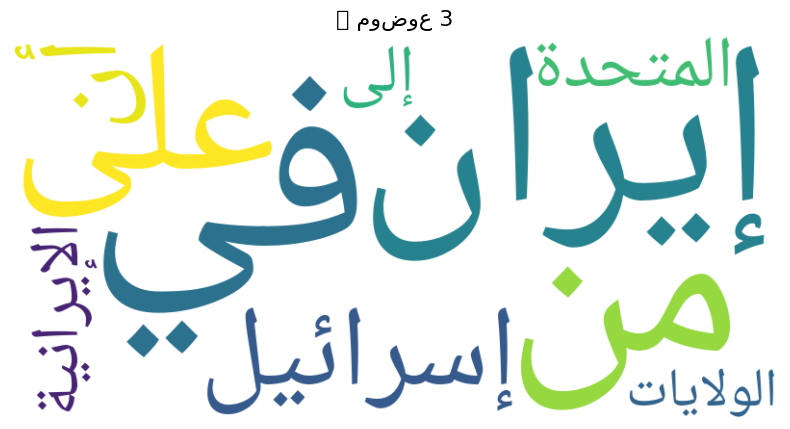

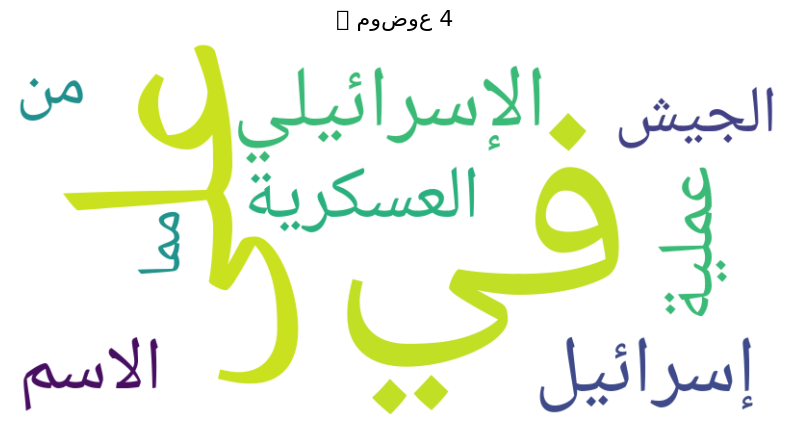

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "/usr/share/fonts/truetype/NotoNaskhArabic-Regular.ttf"

for topic_id in topic_model.get_topic_freq()["Topic"].values:
    if topic_id == -1:
        continue
    topic_words = dict(topic_model.get_topic(topic_id))
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400
    ).generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"🟢 موضوع {topic_id}", fontsize=16)
    plt.show()



In [127]:
topic_model.visualize_topics()


In [129]:
topic_model.visualize_barchart(top_n_topics=5)



 Extracted 6 Al Jazeera articles.
